In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdeaaa7f9e8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdeaaabd208>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [12]:
most_recent = session.query(Measurement.prcp, Measurement.station, Measurement.tobs, Measurement.date, Measurement.id).\
    order_by(Measurement.date.desc()).first()
most_recent

(0.0, 'USC00519397', 81.0, '2017-08-23', 2724)

In [13]:
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdeaaabd400>,
 'tobs': 81.0,
 'date': '2017-08-23',
 'id': 2724,
 'prcp': 0.0,
 'station': 'USC00519397'}

In [14]:
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [15]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = last_date[0]
last_date = last_date.split('-')
last_date

['2017', '08', '23']

In [16]:
year_ago_date = dt.date(int(last_date[0]), int(last_date[1]), int(last_date[2])) - dt.timedelta(days=365)
year_ago_date

datetime.date(2016, 8, 23)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [211]:
year_precip_avg = (session.query(Measurement.date,func.avg(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago).group_by(Measurement.date).all())
#year_precip_avg

In [212]:
#Sum Precip
year_precip_sum = (session.query(Measurement.date,func.sum(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago).group_by(Measurement.date).all())
#year_precip_sum

In [238]:
# Perform a query to retrieve the data and precipitation scores
#Max Precip
year_precip_max =(session.query(Measurement.date,func.max(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).group_by(Measurement.date).all())
year_precip_max

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [189]:
# Save the query results as a Pandas DataFrame
prec_df=pd.DataFrame(year_precip_max, columns=['Date', 'Precipitation'])
prec_df

,Date,Precipitation
0,2016-08-23,1.79
1,2016-08-24,2.28
2,2016-08-25,0.21
3,2016-08-26,0.04
4,2016-08-27,0.18
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.56
364,2017-08-22,0.50


In [190]:
# Set the index to the date column
prec_df.set_index('Date',inplace=True)
prec_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [191]:
# Sort the dataframe by date
prec_df.sort_values(by=["Date"], ascending=False)

,Precipitation
Date,
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.56
2017-08-20,0.01
2017-08-19,0.09
...,...
2016-08-27,0.18
2016-08-26,0.04
2016-08-25,0.21


In [206]:
# Print summary statistics
prec_df.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


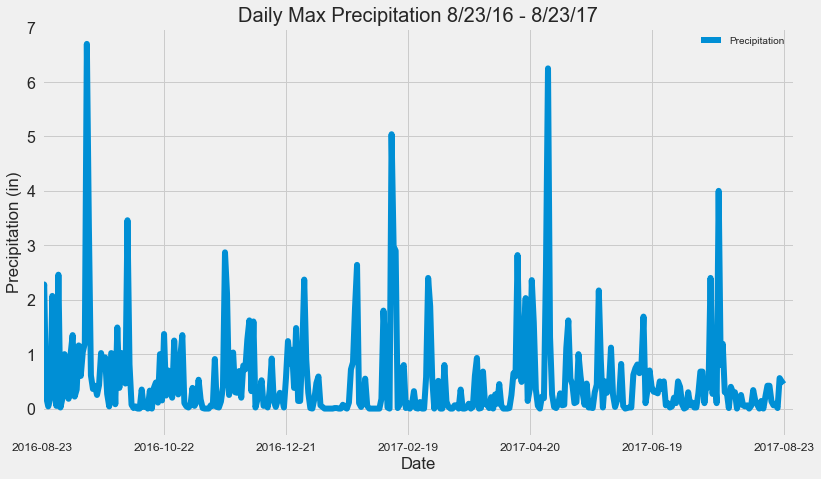

In [241]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(12,7)
prec_df.plot(linewidth=6, xticks=(0,60,120,180,240,300,365))
plt.xlim(-0,370)
plt.ylim(-0.5,7)
plt.yticks(size=16)
plt.xticks(fontsize=12)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Daily Max Precipitation 8/23/16 - 8/23/17',fontsize=20)
plt.show()

In [193]:
sum_prec=pd.DataFrame(year_precip_sum, columns=['Date', 'Precipitation'])
sum_prec.set_index('Date',inplace=True)
sum_prec

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station.station).count()
num_stations


9

In [41]:

stations = session.query(Station.station).all()
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [43]:
stations_num = session.query(Station.station, Measurement.station).count()
stations_num

175950

In [ ]:
year_precp=(session.query(Measurement.date, func.max(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precp

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, Measurement.id, func.count(Measurement.date)).group_by(Measurement.station).all())
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "ID", "Date"])
active_stations_df

,Station,ID,Date
0,USC00511918,14960,1979
1,USC00513117,2725,2709
2,USC00514830,5434,2202
3,USC00516128,16939,2612
4,USC00517948,7636,1372
5,USC00518838,9008,511
6,USC00519281,12188,2772
7,USC00519397,1,2724
8,USC00519523,9519,2669


In [176]:
active_stations = (session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all())
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "TOBS"])
active_stations_df.sort_values(by=["TOBS"], ascending=False)

,Station,TOBS
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [215]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.min(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
top_temp

[('USC00519281', '2013-01-16', 13294, 54.0)]

In [216]:
low_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.max(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
low_temp

[('USC00519281', '2015-09-10', 14261, 85.0)]

In [172]:
avg_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.avg(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
avg_temp

[('USC00519281', '2010-01-01', 12188, 71.66378066378067)]

In [174]:
temps = (session.query(Measurement.station, Measurement.date, Measurement.tobs)).filter((Measurement.station)=="USC00519281").all()
temps_df = pd.DataFrame(temps, columns=["Station", "Date", "TOBS"]).dropna()
temps_df.sort_values(by=["TOBS"], ascending=True)

,Station,Date,TOBS
1106,USC00519281,2013-01-16,54.0
2223,USC00519281,2016-02-08,56.0
1866,USC00519281,2015-02-15,56.0
1892,USC00519281,2015-03-13,56.0
1825,USC00519281,2015-01-05,56.0
...,...,...,...
2765,USC00519281,2017-08-06,83.0
2019,USC00519281,2015-07-18,83.0
2068,USC00519281,2015-09-05,83.0
2072,USC00519281,2015-09-09,84.0


In [175]:
temps_df.describe()

,TOBS
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps=(session.query(Measurement.date, Measurement.tobs)).filter((Measurement.station)=="USC00519281").filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all()
year_temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [181]:
temps_df=pd.DataFrame(year_temps, columns=['Date', 'Temperature'])
temps_df = temps_df.set_index(["Date"])
temps_df

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


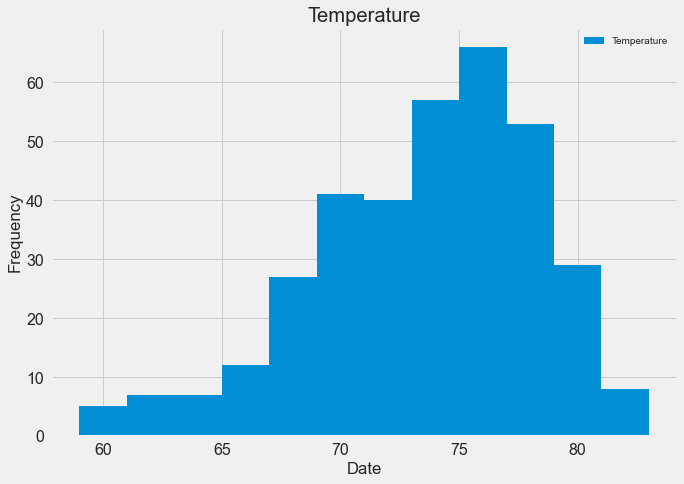

<Figure size 864x504 with 0 Axes>

In [185]:
temps_chart = temps_df.plot(kind='hist', bins=12, figsize=(10,7))

temps_chart.set_xlabel("Date")
temps_chart.set_ylabel("Frequency")
temps_chart.set_title("Temperature")
plt.yticks(size=16)
plt.xticks(fontsize=16)
plt.show()
plt.tight_layout()

# Close session

In [19]:
# Close Session
session.close()